# XKCD Color Survey Analysis

## Initial Observations from XKCD and browsing in sqlite

1. Way more men responded than women
2. 9942 people out of 152401 respondents spell fuchsia 'fuschia'
3. XKCD fans swear a lot
4. I should have expected sql injections
5. the worst spammer in the database was someone who named 2,400 colors a racial slur

## Questions

1. How many questions did people answer before they got bored?
2. How much time/answers before people started swearing?

## Problems

1. The dataset is 369mb which made most queries too much for sqlite
2. I did a bunch of analysis before I realize the spam wasn't removed

In [72]:
import pandas as pd
import sqlite3
import requests
import seaborn as sns

In [87]:
conn = sqlite3.connect("datasets/data.db")
df = pd.read_sql_query("SELECT * FROM answers;", conn)

In [ ]:
try:
    sample = df.sample(100)
except requests.Timeout as err:
    print(err.message)

In [75]:
spammers = pd.read_csv("csv/spammers.csv")
spammers = list(spammers.id)

In [76]:
example_spammer = 134686
example_spammer in spammers # get this chode out of my data

False

In [38]:
spamIndexes = df[ df['user_id'].isin(spammers) ].index
 
# Delete these row indexes from dataFrame
df.drop(spamIndexes , inplace=True)

AssertionError: 

In [ ]:
sample.count()

In [ ]:
sample.user_id.nunique()

In [77]:
sample2 = pd.read_sql_query("SELECT * FROM answers LIMIT 2000;", conn)

In [78]:
sample2.user_id.nunique()

113

In [90]:
sns.countplot(x="user_id", palette="spring", data=sample2)

AttributeError: module 'seaborn' has no attribute 'hist'

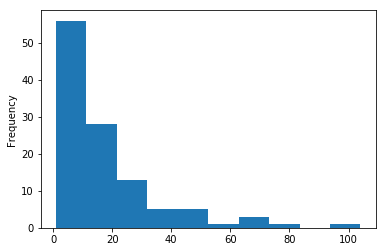

In [80]:
sample2['user_id'].value_counts().plot(kind='hist')

/home/jas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


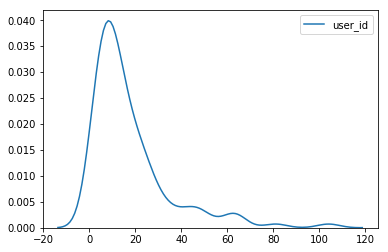

In [81]:
kde = sns.kdeplot(sample2.user_id.value_counts())

In [1]:
# sample2.user_id.value_counts()

In [75]:
kde

## Timestamp Stuff

In [82]:
sample.head()

,id,user_id,datestamp,r,g,b,colorname
849323,849324,38848,1.267684e+09,249,206,190,pink
583417,583418,27306,1.267597e+09,235,248,214,white
1121722,1121723,51329,1.267826e+09,44,152,171,blue
1706893,1706895,77696,1.268280e+09,147,11,118,purple
2644266,2644268,118730,1.269282e+09,64,88,138,blue


In [105]:
from datetime import datetime
def convert_timestamp(time):
    time = int(time)
    time = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    return pd.Timestamp(time)

In [107]:
sample["datestamp"] = sample["datestamp"].apply(convert_timestamp)

In [108]:
sample.head()

,id,user_id,datestamp,r,g,b,colorname
849323,849324,38848,2010-03-04 06:20:05,249,206,190,pink
583417,583418,27306,2010-03-03 06:16:28,235,248,214,white
1121722,1121723,51329,2010-03-05 21:49:13,44,152,171,blue
1706893,1706895,77696,2010-03-11 04:04:12,147,11,118,purple
2644266,2644268,118730,2010-03-22 18:27:04,64,88,138,blue


In [10]:
xx_chrom_user_ids = pd.read_csv("csv/xx_chrom_users.csv")
xx_chrom_user_ids.head()

,id
0,4
1,33
2,37
3,41
4,68


In [88]:
xx_chroms = df[df['user_id'].isin(xx_chrom_user_ids['id'])]

In [83]:
xx_chroms.head()

,id,user_id,datestamp,r,g,b,colorname
9,10,4,1.267419e+09,154,42,159,purple
12,13,4,1.267419e+09,116,208,126,green
15,16,4,1.267419e+09,27,34,98,navy blue
20,21,4,1.267419e+09,12,208,219,teal
22,23,4,1.267419e+09,131,79,90,aubergine


In [89]:
xx_chroms.user_id.mode()

0    134686
dtype: int64

In [86]:
# Removing this user. Yikes!
# xx_chroms[xx_chroms["user_id"] == 134686]